In [2]:
import re
import json
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
# from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
#BASE CORPUS
pd.options.display.width = 0
pd.set_option('display.width', 5)
pd.set_option('display.max_columns', 10, 'display.width', 10, 'display.max_colwidth', 20, 'display.max_rows',100)
df = pd.read_json('../datasets/1_newsDataset.json')
df['category'] = df['articles'].apply(lambda x: x['category'])
df['headline'] = df['articles'].apply(lambda x: x['headline'])
df['authors'] = df['articles'].apply(lambda x: x['authors'])
df['link'] = df['articles'].apply(lambda x: x['link'])
df['short_descrisption'] = df['articles'].apply(lambda x: x['short_description'])
df['date'] = df['articles'].apply(lambda x: x['date'])
data = df.drop('articles', axis=1)

print('shape:', df.shape)
pd.options.display.width = 0
pd.set_option('display.width', 5)
data

shape: (200853, 7)


,category,headline,authors,link,short_descrisption,date
0,CRIME,There Were 2 Mas...,Melissa Jeltsen,https://www.huff...,She left her hus...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins...,Andy McDonald,https://www.huff...,Of course it has...,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marri...,Ron Dicker,https://www.huff...,The actor and hi...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blast...,Ron Dicker,https://www.huff...,The actor gives ...,2018-05-26
4,ENTERTAINMENT,Julianna Marguli...,Ron Dicker,https://www.huff...,"The ""Dietland"" a...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten...,"Reuters, Reuters",https://www.huff...,Verizon Wireless...,2012-01-28
200849,SPORTS,Maria Sharapova ...,,https://www.huff...,"Afterward, Azare...",2012-01-28
200850,SPORTS,Giants Over Patr...,,https://www.huff...,Leading up to Su...,2012-01-28
200851,SPORTS,Aldon Smith Arre...,,https://www.huff...,CORRECTION: An e...,2012-01-28


In [26]:
#FILTERED
pd.options.display.width = 0
pd.set_option('display.width', 5)
pd.set_option('display.max_columns', 10, 'display.width', 10, 'display.max_colwidth', 20, 'display.max_rows',100)
df = pd.read_json('../datasets/2_filtered_news.json')
df['category'] = df['articles'].apply(lambda x: x['category'])
df['headline'] = df['articles'].apply(lambda x: x['headline'])
df['authors'] = df['articles'].apply(lambda x: x['authors'])
df['link'] = df['articles'].apply(lambda x: x['link'])
df['short_descrisption'] = df['articles'].apply(lambda x: x['short_description'])
df['date'] = df['articles'].apply(lambda x: x['date'])
data = df.drop('articles', axis=1)

print('shape:', df.shape)
pd.options.display.width = 0
pd.set_option('display.width', 5)
data

shape: (24081, 7)


,category,headline,authors,link,short_descrisption,date
0,WOMEN,Morgan Freeman D...,Mary Papenfuss,https://www.huff...,Both Visa and Va...,2018-05-25
1,WOMEN,The Joy Of Watch...,Emma Gray,https://www.huff...,There's a delici...,2018-05-25
2,WOMEN,The 20 Funniest ...,Hollis Miller,https://www.huff...,"""Welcome to adul...",2018-05-25
3,WOMEN,Morgan Freeman A...,Sebastian Murdock,https://www.huff...,Eight people tol...,2018-05-24
4,SPORTS,Jets Chairman Ch...,Ron Dicker,https://www.huff...,“I never want to...,2018-05-24
...,...,...,...,...,...,...
24076,BUSINESS,Positive Custome...,"Ernan Roman, Con...",https://www.huff...,"""Analysts at Ado...",2012-01-28
24077,SPORTS,Maria Sharapova ...,,https://www.huff...,"Afterward, Azare...",2012-01-28
24078,SPORTS,Giants Over Patr...,,https://www.huff...,Leading up to Su...,2012-01-28
24079,SPORTS,Aldon Smith Arre...,,https://www.huff...,CORRECTION: An e...,2012-01-28


In [27]:
#SCRAPED = TEXT & GENDER
pd.options.display.width = 0
pd.set_option('display.width', 5)
pd.set_option('display.max_columns', 10, 'display.width', 10, 'display.max_colwidth', 30, 'display.max_rows',100)
df = pd.read_json('../datasets/3_text_and_gender.json')
df['gender'] = df['articles'].apply(lambda x: x['gender'])
df['text'] = df['articles'].apply(lambda x: x['text'])
data = df.drop('articles', axis=1)

print('shape:', df.shape)
pd.options.display.width = 0
pd.set_option('display.width', 5)
data

shape: (23311, 3)


,gender,text
0,F,At least two org...
1,F,The best way to ...
2,F,The ladies of Tw...
3,F,Multiple women h...
4,M,When it comes to...
...,...,...
23306,M,The Challenge: H...
23307,M,"By Steve Tignor,..."
23308,M,Leading up to Su...
23309,M,49ers rookie and...


Text(0.5, 1.0, "Distribution of articles' categories")

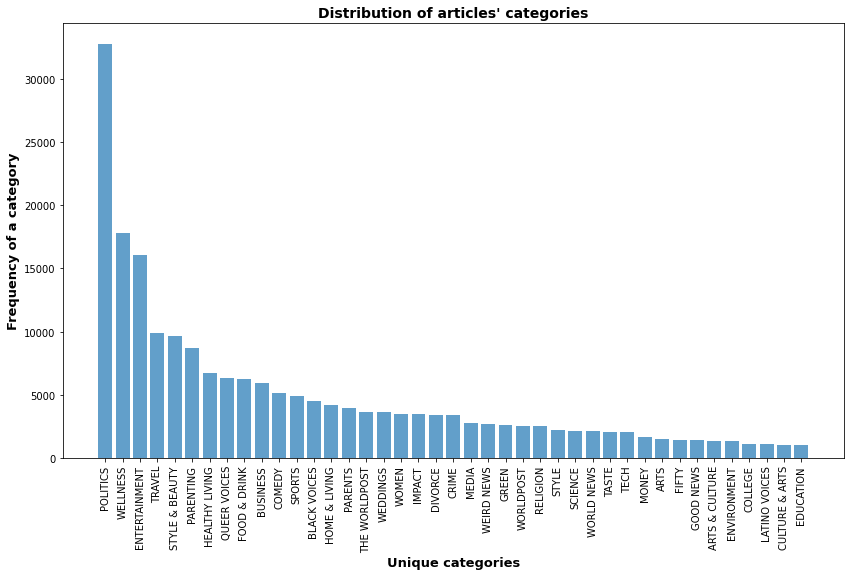

In [11]:
my_cmap = plt.get_cmap("tab20")
count = data.category.value_counts()
rescale = lambda y: y - np.max(y)
# rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.figure(figsize=(14,8))
bars = plt.bar(count.index, count, color=my_cmap(rescale(list(count))), width=0.8, alpha=0.7, align='center')
plt.xticks(rotation=90)
plt.ylabel('Frequency of a category', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.xlabel('Unique categories', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.title("Distribution of articles' categories", fontdict={'fontsize':14, 'fontweight': 'bold'})